<a href="https://colab.research.google.com/github/Dev16-11/Home-Price-Prediction-Analysis-Project/blob/main/Titanic_Survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv("/content/ML Project - Logistic Regression Titanic Survival U16955478860.txt")

### Load Dataset

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Print All columns name

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Describe Data

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check the NUll values

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


### handle Null Values

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


### Creating feature and target data

In [ ]:
x=df.drop(["Survived","Name","Ticket"],axis=1)
y=df["Survived"]

In [ ]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,female,38.0,1,0,71.2833,C85,C
3,4,1,female,35.0,1,0,53.1000,C123,S
6,7,1,male,54.0,0,0,51.8625,E46,S
10,11,3,female,4.0,1,1,16.7000,G6,S
11,12,1,female,58.0,0,0,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...
871,872,1,female,47.0,1,1,52.5542,D35,S
872,873,1,male,33.0,0,0,5.0000,B51 B53 B55,S
879,880,1,female,56.0,0,1,83.1583,C50,C
887,888,1,female,19.0,0,0,30.0000,B42,S


In [ ]:
y

,Survived
1,1
3,1
6,0
10,1
11,1
...,...
871,1
872,0
879,1
887,1


### Encoding the data

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
enc=LabelEncoder()

In [ ]:
x["Cabin"]=enc.fit_transform(x["Cabin"])
x["Embarked"]=enc.fit_transform(x["Embarked"])
x["Sex"]=enc.fit_transform(x["Sex"])

In [ ]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,2,1,0,38.0,1,0,71.2833,72,0
3,4,1,0,35.0,1,0,53.1000,48,2
6,7,1,1,54.0,0,0,51.8625,117,2
10,11,3,0,4.0,1,1,16.7000,131,2
11,12,1,0,58.0,0,0,26.5500,43,2
...,...,...,...,...,...,...,...,...,...
871,872,1,0,47.0,1,1,52.5542,91,2
872,873,1,1,33.0,0,0,5.0000,29,2
879,880,1,0,56.0,0,1,83.1583,61,0
887,888,1,0,19.0,0,0,30.0000,25,2


### Splitting the data in training and testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print("x_train:::",x_train.shape)
print("x_test::::",x_test.shape)
print("y_train:::",y_train.shape)
print("y_test::::",y_test.shape)

x_train::: (146, 9)
x_test:::: (37, 9)
y_train::: (146,)
y_test:::: (37,)


### Model Implementation

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(x_train,y_train)

0.7808219178082192

In [ ]:
model.score(x_test,y_test)

0.7567567567567568

### Displaying Confussion Matrix,Accuracy Score,Precision Score,Recall Score,f1_score

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7567567567567568

In [ ]:
precision_score(y_test,y_pred)

0.7916666666666666

In [ ]:
confusion_matrix(y_pred,y_test)

array([[ 9,  4],
       [ 5, 19]])

In [ ]:
recall_score(y_pred,y_test)

0.7916666666666666

In [ ]:
f1_score(y_pred,y_test)

0.8085106382978723

### Find the probability of testing data

In [ ]:
y_probab=model.predict_proba(x_test)

In [ ]:
y_probab

array([[0.39335034, 0.60664966],
       [0.11191552, 0.88808448],
       [0.01674677, 0.98325323],
       [0.3859531 , 0.6140469 ],
       [0.49724781, 0.50275219],
       [0.73380925, 0.26619075],
       [0.50059239, 0.49940761],
       [0.08899785, 0.91100215],
       [0.09712465, 0.90287535],
       [0.68463049, 0.31536951],
       [0.58399969, 0.41600031],
       [0.09094602, 0.90905398],
       [0.67735758, 0.32264242],
       [0.04456319, 0.95543681],
       [0.63247282, 0.36752718],
       [0.53339282, 0.46660718],
       [0.05602485, 0.94397515],
       [0.58855283, 0.41144717],
       [0.56250615, 0.43749385],
       [0.04988129, 0.95011871],
       [0.07954827, 0.92045173],
       [0.10035576, 0.89964424],
       [0.57247391, 0.42752609],
       [0.35738468, 0.64261532],
       [0.71815753, 0.28184247],
       [0.03777842, 0.96222158],
       [0.12803556, 0.87196444],
       [0.73597065, 0.26402935],
       [0.09587134, 0.90412866],
       [0.07817818, 0.92182182],
       [0.

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt

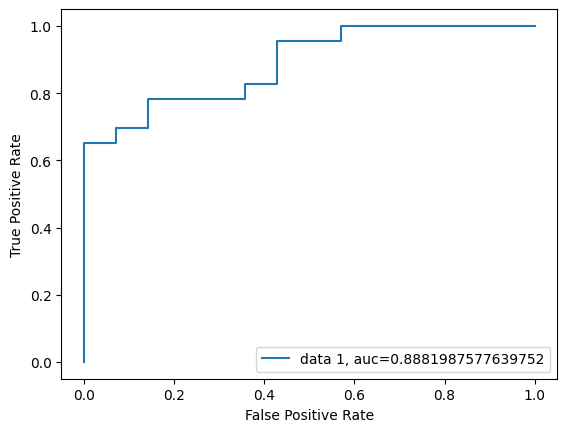

In [ ]:
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc=" + str(auc))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()